In [11]:
from statsbombpy import sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, f1_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from tqdm import tqdm



In [11]:
sb.competitions().head()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-08-17T23:51:11.837478,None,None,2023-08-17T23:51:11.837478
1,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
2,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
3,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00


In [59]:
sb.competitions()[sb.competitions()['country_name'] == 'England']

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
22,37,90,England,FA Women's Super League,female,False,False,2020/2021,2023-02-25T14:52:09.326729,2021-06-13T16:17:31.694,None,2023-02-25T14:52:09.326729
23,37,42,England,FA Women's Super League,female,False,False,2019/2020,2023-07-25T01:08:03.214566,2021-06-13T16:17:31.694,None,2023-07-25T01:08:03.214566
24,37,4,England,FA Women's Super League,female,False,False,2018/2019,2023-07-24T19:50:20.881595,2021-06-13T16:17:31.694,None,2023-07-24T19:50:20.881595
58,2,27,England,Premier League,male,False,False,2015/2016,2023-07-12T13:59:45.191483,2021-06-13T16:17:31.694,None,2023-07-12T13:59:45.191483
59,2,44,England,Premier League,male,False,False,2003/2004,2023-03-11T10:52:12.579230,2021-06-13T16:17:31.694,None,2023-03-11T10:52:12.579230


In [6]:
sb.matches(competition_id=2,season_id=27)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3754058,2016-01-02,16:00:00.000,England - Premier League,2015/2016,Leicester City,AFC Bournemouth,0,0,available,...,2021-06-12T16:17:31.694,20,Regular Season,King Power Stadium,Andre Marriner,Claudio Ranieri,Eddie Howe,1.1.0,2,2
1,3754245,2015-10-17,16:00:00.000,England - Premier League,2015/2016,West Bromwich Albion,Sunderland,1,0,available,...,2021-06-13T16:17:31.694,9,Regular Season,The Hawthorns,Martin Atkinson,Tony Pulis,Sam Allardyce,1.1.0,2,2
2,3754136,2015-12-19,18:30:00.000,England - Premier League,2015/2016,Newcastle United,Aston Villa,1,1,available,...,2021-06-13T16:17:31.694,17,Regular Season,St. James'' Park,Martin Atkinson,Steve McClaren,Rémi Garde,1.1.0,2,2
3,3754037,2016-04-30,16:00:00.000,England - Premier League,2015/2016,Everton,AFC Bournemouth,2,1,available,...,2021-06-12T16:17:31.694,36,Regular Season,Goodison Park,Neil Swarbrick,Roberto Martínez Montoliú,Eddie Howe,1.1.0,2,2
4,3754039,2016-02-13,16:00:00.000,England - Premier League,2015/2016,Crystal Palace,Watford,1,2,available,...,2021-06-12T16:17:31.694,26,Regular Season,Selhurst Park,Robert Madley,Alan Pardew,Enrique Sánchez Flores,1.1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,3754020,2015-08-17,21:00:00.000,England - Premier League,2015/2016,Liverpool,AFC Bournemouth,1,0,available,...,2021-06-13T16:17:31.694,2,Regular Season,Anfield,Craig Pawson,Brendan Rodgers,Eddie Howe,1.1.0,2,2
376,3754267,2015-08-15,16:00:00.000,England - Premier League,2015/2016,Watford,West Bromwich Albion,0,0,available,...,2021-06-13T16:17:31.694,2,Regular Season,Vicarage Road,Paul Tierney,Enrique Sánchez Flores,Tony Pulis,1.1.0,2,2
377,3754141,2015-08-09,14:30:00.000,England - Premier League,2015/2016,Arsenal,West Ham United,0,2,available,...,2021-06-13T16:17:31.694,1,Regular Season,Emirates Stadium,Martin Atkinson,Arsène Wenger,Slaven Bilić,1.1.0,2,2
378,3754128,2015-08-08,16:00:00.000,England - Premier League,2015/2016,AFC Bournemouth,Aston Villa,0,1,available,...,2021-06-13T16:17:31.694,1,Regular Season,Vitality Stadium,Mark Clattenburg,Eddie Howe,Tim Sherwood,1.1.0,2,2


In [18]:
torneo1 = sb.matches(competition_id=43,season_id=106)
torneo2 = sb.matches(competition_id=43,season_id=3)
torneo3 = sb.matches(competition_id=11,season_id=90)
torneo4 = sb.matches(competition_id=11,season_id=42)
torneo5 = sb.matches(competition_id=11,season_id=27)
torneo6 = sb.matches(competition_id=2,season_id=27)
match_ids = torneo1.match_id.tolist() + torneo2.match_id.tolist() + torneo3.match_id.tolist() + torneo4.match_id.tolist() + torneo5.match_id.tolist() + torneo6.match_id.tolist() 

In [27]:
tiros_tot = pd.DataFrame()

for x in tqdm(range(0, len(match_ids))):
    partido = sb.events(match_id=match_ids[x])
    tiros = partido[partido.type == 'Shot']
    tiros_tot = pd.concat([tiros_tot, tiros], ignore_index=True)
   


tiros_tot[['x', 'y']] = tiros_tot['location'].apply(pd.Series)
tiros_tot.to_csv('tirosStatsBomb_modeloxG_v2.csv')

100%|██████████| 956/956 [1:04:43<00:00,  4.06s/it]
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_8568\238706738.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tiros_tot[['x', 'y']] = tiros_tot['location'].apply(pd.Series)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_8568\238706738.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tiros_tot[['x', 'y']] = tiros_tot['location'].apply(pd.Series)


In [28]:
tiros_statsbomb = pd.read_csv('tirosStatsBomb_modeloxG_v2.csv')

In [29]:
tiros_statsbomb.shape

(23867, 121)

In [32]:
booleanos = pd.Series(tiros_statsbomb.columns).str.contains('shot')
df_test = pd.concat([pd.Series(tiros_statsbomb.columns),booleanos],axis = 1)
df_test[df_test.iloc[:,1] == True]

,0,1
40,pass_assisted_shot_id,True
53,pass_shot_assist,True
68,shot_aerial_won,True
69,shot_body_part,True
70,shot_deflected,True
71,shot_end_location,True
72,shot_first_time,True
73,shot_freeze_frame,True
74,shot_key_pass_id,True
75,shot_one_on_one,True


In [33]:
tiros_filt = tiros_statsbomb[['shot_aerial_won',             
'shot_body_part',               
'shot_first_time',
'shot_deflected',             
'shot_one_on_one',             
'shot_open_goal',              
'shot_outcome',                 
'shot_technique',               
'shot_type',              
'play_pattern',                 
'x',
'y'
]].reset_index(drop=True)
tiros_filt['goal'] = np.where(tiros_filt.shot_outcome == 'Goal', 1,0)
tiros_filt['Distance'] = np.sqrt(np.square(120-tiros_filt['x']) + np.square(40 - tiros_filt['y']))
tiros_filt['angulo'] = np.arctan(7.32 *tiros_filt['x'] /(tiros_filt['x']**2 + tiros_filt['y']**2 - (7.32/2)**2))
tiros_filt.shot_aerial_won = tiros_filt.shot_aerial_won.fillna(False)
tiros_filt.shot_first_time = tiros_filt.shot_first_time.fillna(False)
tiros_filt.shot_one_on_one = tiros_filt.shot_one_on_one.fillna(False)
tiros_filt.shot_open_goal = tiros_filt.shot_open_goal.fillna(False)
tiros_filt.shot_deflected = tiros_filt.shot_open_goal.fillna(False)
tiros_filt.head()

,shot_aerial_won,shot_body_part,shot_first_time,shot_deflected,shot_one_on_one,shot_open_goal,shot_outcome,shot_technique,shot_type,play_pattern,x,y,goal,Distance,angulo
0,False,Left Foot,True,False,False,False,Blocked,Half Volley,Open Play,From Kick Off,96.0,38.8,0,24.029981,0.065531
1,False,Left Foot,True,False,False,False,Saved,Half Volley,Open Play,From Kick Off,113.1,40.7,0,6.935416,0.057292
2,False,Right Foot,True,False,False,False,Saved,Half Volley,Open Play,From Kick Off,103.8,41.9,0,16.311039,0.060630
3,False,Head,False,False,False,False,Off T,Normal,Open Play,From Corner,112.2,36.8,0,8.430896,0.058893
4,False,Left Foot,False,False,False,False,Post,Normal,Open Play,Regular Play,97.8,51.5,0,25.001800,0.058595


In [35]:
tiros_filt.head()

,shot_aerial_won,shot_body_part,shot_first_time,shot_deflected,shot_one_on_one,shot_open_goal,shot_outcome,shot_technique,shot_type,play_pattern,x,y,goal,Distance,angulo
0,False,Left Foot,True,False,False,False,Blocked,Half Volley,Open Play,From Kick Off,96.0,38.8,0,24.029981,0.065531
1,False,Left Foot,True,False,False,False,Saved,Half Volley,Open Play,From Kick Off,113.1,40.7,0,6.935416,0.057292
2,False,Right Foot,True,False,False,False,Saved,Half Volley,Open Play,From Kick Off,103.8,41.9,0,16.311039,0.060630
3,False,Head,False,False,False,False,Off T,Normal,Open Play,From Corner,112.2,36.8,0,8.430896,0.058893
4,False,Left Foot,False,False,False,False,Post,Normal,Open Play,Regular Play,97.8,51.5,0,25.001800,0.058595


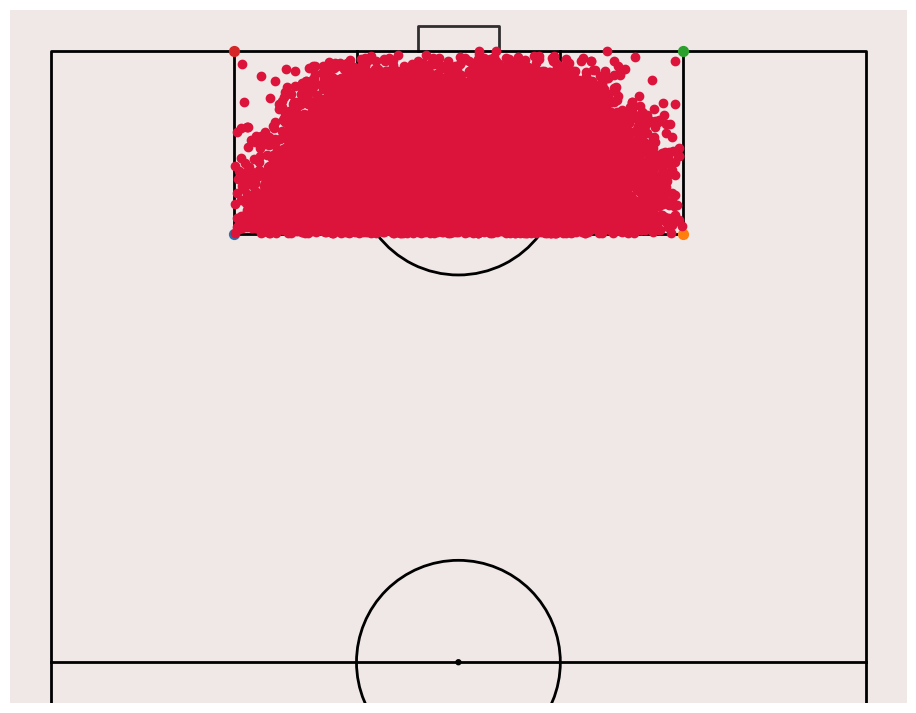

In [46]:
fig , ax = plt.subplots(figsize = (16,9))
facecolor = "#EFE8E6"
Pitch = VerticalPitch(pitch_type='statsbomb',goal_type='box',goal_alpha=.8,pitch_color=facecolor,line_color='black',half=True)
Pitch.draw(ax=ax)

Pitch.scatter(102,18,ax=ax,s=50)
Pitch.scatter(102,62,ax=ax,s=50)
Pitch.scatter(120,62,ax=ax,s=50)
Pitch.scatter(120,18,ax=ax,s=50)

tiros_filt['area'] = np.where((tiros_filt['x']> 102) & (tiros_filt['y'] > 18) & (tiros_filt['y']< 62),True,False)
Pitch.scatter(tiros_filt[tiros_filt['area'] == True].x, tiros_filt[tiros_filt['area'] == True].y, ax=ax, color='#DC143C')


In [47]:
y = tiros_filt['goal']
X = tiros_filt.drop(columns=['goal', 'shot_outcome'])

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 13)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['shot_body_part', 'shot_technique', 'shot_type', 'play_pattern'])
    ],
    remainder= 'passthrough'
)

model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

model.fit(X_test, y_test)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['shot_body_part',
                                                   'shot_technique',
                                                   'shot_type',
                                                   'play_pattern'])])),
                ('classifier', LogisticRegression())])

In [48]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
from sklearn.metrics import confusion_matrix
preds = model.predict(X_test)
df_cm = pd.DataFrame(confusion_matrix(y_test, preds))  # return  tn, fp, fn, tp

VP = df_cm.iloc[1,1]
VN = df_cm.iloc[0,0]
FN = df_cm.iloc[1,0]
FP = df_cm.iloc[0,1]
exactitud = accuracy = (VP + VN)/(VP + VN + FN + FP)
precision = VP/(VP + FP)
sensibilidad = VP/(VP + FN)
especifidad = VN/(FP + VN)

print('La exactitud del modelo elegido es: ' + str(exactitud))
print('La precision del modelo elegido es: ' + str(precision))
print('La sensibilidad del modelo elegido es: ' + str(sensibilidad))
print('La especifidad del modelo elegido es: ' + str(especifidad))

La exactitud del modelo elegido es: 0.901340594888982
La precision del modelo elegido es: 0.6643356643356644
La sensibilidad del modelo elegido es: 0.1833976833976834
La especifidad del modelo elegido es: 0.9887218045112782


In [50]:
probabilities = model.predict_proba(X)[:,1]
probabilities = pd.DataFrame(probabilities, columns=['xG'])
X_with_prob = pd.concat([X.reset_index(drop=True), probabilities], axis=1)
X_with_prob

,shot_aerial_won,shot_body_part,shot_first_time,shot_deflected,shot_one_on_one,shot_open_goal,shot_technique,shot_type,play_pattern,x,y,Distance,angulo,area,xG
0,False,Left Foot,True,False,False,False,Half Volley,Open Play,From Kick Off,96.0,38.8,24.029981,0.065531,False,0.033222
1,False,Left Foot,True,False,False,False,Half Volley,Open Play,From Kick Off,113.1,40.7,6.935416,0.057292,True,0.356983
2,False,Right Foot,True,False,False,False,Half Volley,Open Play,From Kick Off,103.8,41.9,16.311039,0.060630,True,0.109980
3,False,Head,False,False,False,False,Normal,Open Play,From Corner,112.2,36.8,8.430896,0.058893,True,0.102322
4,False,Left Foot,False,False,False,False,Normal,Open Play,Regular Play,97.8,51.5,25.001800,0.058595,False,0.033331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23862,False,Right Foot,False,False,False,False,Normal,Open Play,Regular Play,109.1,29.8,14.928161,0.062420,True,0.127691
23863,False,Right Foot,False,False,True,False,Normal,Open Play,From Counter,114.6,51.4,12.614278,0.053172,True,0.374969
23864,False,Right Foot,False,False,False,False,Normal,Open Play,From Throw In,98.3,56.9,27.504545,0.055777,False,0.023842
23865,False,Left Foot,False,False,False,False,Normal,Open Play,Regular Play,102.9,58.1,24.900201,0.053940,True,0.031832


In [54]:
X_with_prob[X_with_prob['shot_type'] == 'Penalty'].describe()


,x,y,Distance,angulo,xG
count,344.000000,344.000000,344.000000,344.000000,344.000000
mean,108.156686,40.165116,11.849654,0.059468,0.681359
std,0.354417,0.337550,0.340933,0.000261,0.021957
min,107.100000,39.400000,11.045361,0.058822,0.620812
25%,108.000000,40.000000,11.900000,0.059506,0.668810
50%,108.100000,40.100000,11.901681,0.059550,0.672970
75%,108.100000,40.100000,12.000000,0.059592,0.693519
max,109.000000,41.000000,12.909686,0.060153,0.737623


In [52]:
df_cm

,0,1
0,4208,48
1,423,95


In [55]:
from mplsoccer import FontManager
URL_font ='https://github.com/google/fonts/blob/main/ofl/fjallaone/FjallaOne-Regular.ttf?raw=true'
robotto_regular = FontManager(URL_font)

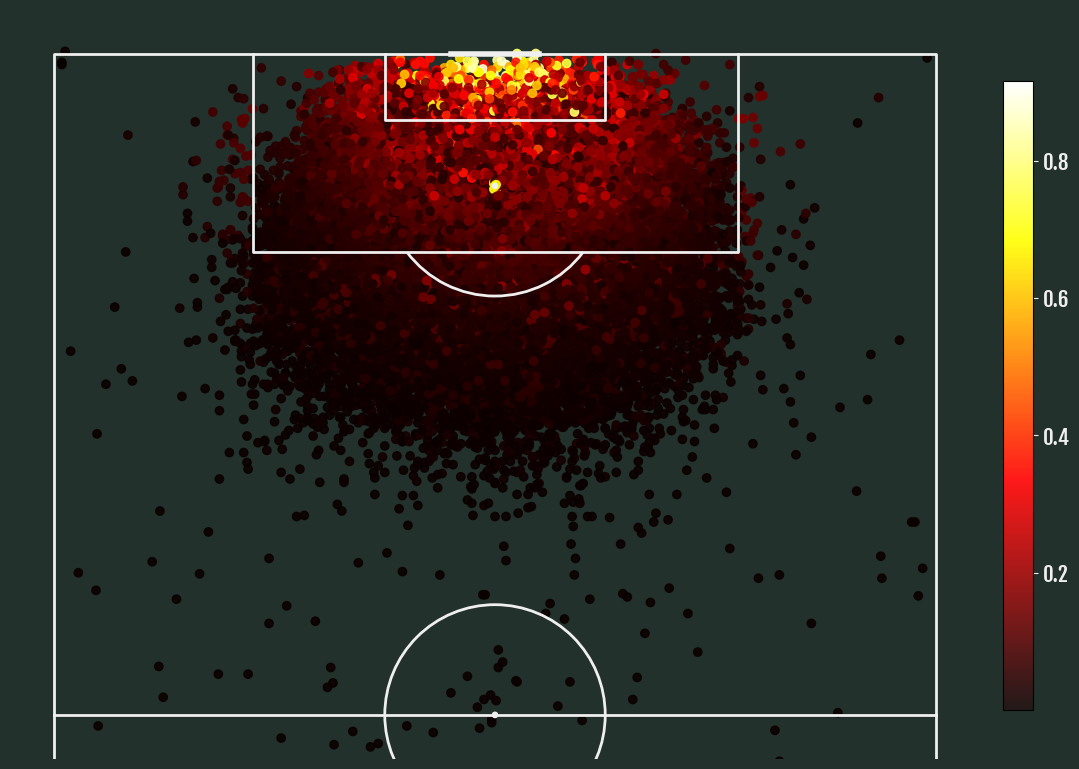

In [57]:
pitch = VerticalPitch(pitch_type = 'statsbomb',line_zorder=2,
                      pitch_color='#22312b',line_color = '#efefef',half=True)
fig,ax = pitch.draw(figsize = (10,8))
fig.set_facecolor('#22312b')

pcm = pitch.scatter(X_with_prob.x , X_with_prob.y , c =X_with_prob['xG'],ax=ax,alpha =.9 , cmap = 'hot')
ax_cbar = fig.add_axes((1.008,0.093,0.03,0.786))
cbar = plt.colorbar(pcm,cmap = 'hot' , cax=ax_cbar)
cbar.ax.yaxis.set_tick_params(color='#efefef')
plt.setp(plt.getp(cbar.ax.axes,'yticklabels'),color ='#efefef')
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(robotto_regular.prop)
    label.set_fontsize(15)